# Колебания математического маятника

### TODO:
* Получите аналитические решения уравнения затухающих колебаний с учетом начальных условий.

### Постановка задачи
Рассмотрим движение математического маятника - материальной точки массы $m$, подвешаенной на нити длины $l$, совершающей затухающие колебания в поле силы тяжести с ускорением свободного падения $g$. Сила сопротивления пропорциональна скорости точки $\vec{F}_c = -\beta \vec{v}$, где $\beta$ - коэффициент сопротивления. Уравнение затухающих колебаний такого маятника имеет вид $$ \frac{d^2 \theta}{dt^2} + 2 \delta \frac{d \theta}{dt} + \omega_0^2 \theta = 0,$$ где $\theta$ - угол отклонения от положения равновесия, $\omega_0 = \sqrt{g/l}$ - собственная частота колебаний математического маятника, $\delta = \beta/(2m)$ - коэффициент затухания. В начальный момент времени угол отклонения равен $\theta(0) = \theta_0$, начальная угловая скорость вращения маятника $d\theta / dt (0) = \dot{\theta}_0$.

Для решения дифференциального уравнения колебаний математического маятника второго порядка рассмотрим систему двух уравнений первого порядка для угла отклонения и угловой скорости: $$ \frac{d \theta}{dt} = \dot{\theta} = x[1], \\ \frac{d \dot{\theta}}{dt} = - 2 \delta \dot{\theta} - \omega_0^2 \theta = - 2 \delta x[1] - \omega_0^2 x[0].$$ Вектор $x = [\theta(t), \dot{\theta}(t)]$ содержит в себе и угол отклонения и угловую скорость в качестве компонент. Функция rhs (right hand side) определяет правые части дифференциальных уравнений и имеет следующее представление в python.

In [ ]:
def rhs(x, t, delta, omega0):
    return [x[1], -2.*delta*x[1]-omega0**2*x[0]]

Определим параметры задачи $\delta = 0.3, \omega_0 = 1.0$ и временной промежуток. Для численного интегрирования полученной задачи с начальными условиями воспользуемся библиотечной функцией [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) модуля scipy.integrate.

In [65]:
from scipy.integrate import odeint
from numpy import linspace, array
delta = 0.3
omega0 = 5.0
time = linspace(0,10,200)
x0 = array([3.,0])
out = odeint(rhs, x0, time, args=(delta, omega0 ))

### Визуализация результатов 
Для построения графиков изменения со временем угла поворота и угловой скорости воспользуется библиотекой matplotlib, в частности для включения графиков в jupyter notebook подключим "магическую" команду [%matplotlib inline](http://qaru.site/questions/117800/purpose-of-matplotlib-inline).

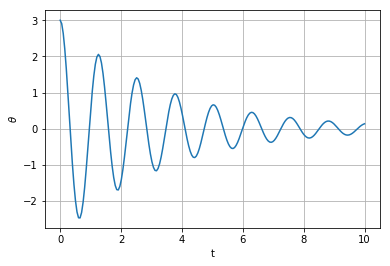

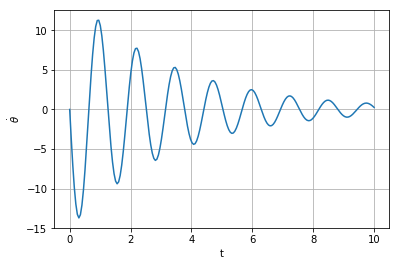

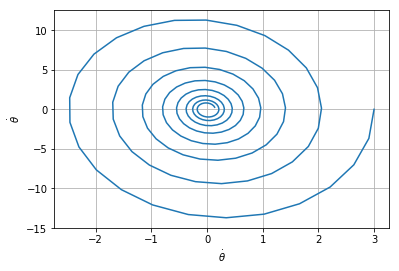

In [72]:
from pylab import show, plot, xlabel, ylabel, grid, legend
%matplotlib inline
grid()
xlabel('t')
ylabel(r'$\theta$')
plot(time, out[:,0])
show()
grid()
xlabel('t')
ylabel(r'$\dot{\theta}$')
plot(time, out[:,1])
show()
grid()
xlabel(r'$\dot{\theta}$')
ylabel(r'$\dot{\theta}$')
plot(out[:,0], out[:,1]);

Три рисунка, представленных выше, иллюстрируют зависимость угла отклонения от времени, угловой скорости колебаний и фазовый портрет колебаний, который содержит особую точку типа [фокус](https://ru.wikipedia.org/wiki/%D0%9E%D1%81%D0%BE%D0%B1%D0%B0%D1%8F_%D1%82%D0%BE%D1%87%D0%BA%D0%B0_(%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F)). Вследствие трения, колебания затухают и фазовые траектории со временем стремятся попасть в эту особую точку $(\theta, \dot{\theta}) = (0,0)$.

### Аналитическое решение
Как известно, уравнение затухающих колебаний допускают 3 типа решений: колебательный режим и две реализации апериодического движения. $$ \theta(t) = e^{-\delta t}(C_1 \cos (\sqrt{\omega_0^2 - \delta^2} t) + C_2 \sin (\sqrt{\omega_0^2 - \delta^2} t)), \text{ при }\omega_0 > \delta, \\ \theta(t) = C_1 e^{\gamma_1 t} + C_2 e^{\gamma_2 t}, \text{ при } \omega_0 < \delta, \\ \theta(t) = C_1 e^{-\delta t} + C_2 te^{-\delta t}, \text{ при } \omega_0 = \delta,$$ где $ \gamma_1 = -\delta + \sqrt{\delta^2 - \omega_0^2},  \gamma_2 = -\delta - \sqrt{\delta^2 - \omega_0^2}$.

В случае затухающих колебаний константы $C_1, C_2$ определяются следующим образом $C_1 = \theta_0, C_2 = (\theta_0 \delta + \dot{\theta}_0)/\sqrt{\omega_0^2 - \delta^2}$. Получите эти выражения самостоятельно.
Аналитические значения колеблющейся величины определяются так:

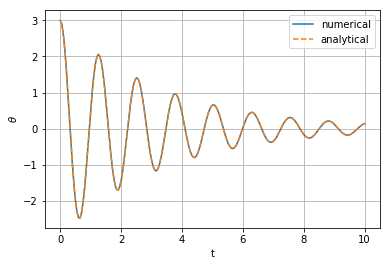

In [73]:
from numpy import exp, sin, cos
omega = (omega0**2 - delta**2)**0.5
C1 = x0[0]
C2 = (x0[0]*delta + x0[1])/omega
thetaAnalytic = exp(-delta*time)*(C1*cos(omega*time)+C2*sin(omega*time))
grid()
xlabel('t')
ylabel(r'$\theta$')
plot(time, out[:,0], label='numerical')
plot(time, thetaAnalytic, '--', label='analytical')
legend();

### Интерактивные вычисления
Для интерактивного задания управляющих параметров и начальных условий можно использовать функцию Jupyter notebook [interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html), которая создает элемент управления (контрол) и вызывает пользовательскю функцию, передавая в качестве аргументов значения, заданные в элементе управления. Для задания парметра при помощи "ползунка" (слайдера) используется виджет [FloatSlider](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

In [69]:
from ipywidgets import interact, FloatSlider

delta_widget = FloatSlider(min=0.0, max=10.0, step=0.05, value=0.3)
omega0_widget = FloatSlider(min=0.0, max=10.0, step=0.05, value=1.0)
theta0_widget = FloatSlider(min=-5.0, max=5.0, step=0.05, value=1.0)
theta0Dot_widget = FloatSlider(min=-5.0, max=5.0, step=0.05, value=1.0)
time__widget = FloatSlider(min=3.0, max=50.0, step=1.0, value=10.0)

def PendulumComp(delta, omega0, theta0, theta0Dot, time):
    time = linspace(0, time, 3000)
    x0 = array([theta0, theta0Dot])
    out = odeint(rhs, x0, time, args=(delta, omega0 ))
    grid()
    xlabel('t')
    ylabel(r'$\theta$')
    plot(time, out[:,0])
    show()

interact(PendulumComp, delta = delta_widget, omega0 = omega0_widget, theta0 = theta0_widget, theta0Dot = theta0Dot_widget, time = time__widget);

interactive(children=(FloatSlider(value=0.3, description='delta', max=10.0, step=0.05), FloatSlider(value=1.0,…

### Анимация
При помощи функции [animate](https://matplotlib.org/2.1.2/gallery/animation/basic_example.html) библиотеки matplotlib создадим простейшую анимацию колебаний математического маятника, конвертируем результат в [JavaScript виджет](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/).

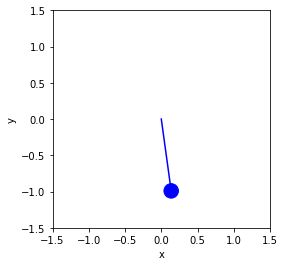

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.set_xlim(( -1.5, 1.5))
ax.set_ylim((-1.5, 1.5))
xlabel('x')
ylabel('y')

centerX = sin(out[0,0])
centerY = -cos(out[0,0])
circle1 = plt.Circle((centerX, centerY), 0.1, color='b')
ax.add_artist(circle1)
line, = ax.plot([0, centerX], [0, centerY], color='b')

def animate(i):
    circle1.center = sin(out[i,0]), -cos(out[i,0])
    line.set_data([0, sin(out[i,0])], [0, -cos(out[i,0])])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, frames=200)
HTML(ani.to_jshtml())

### Вычисление мультипликаторов
Общее решение линейной однородной задачи можно представить в виде суперпозиции (линейной комбинации) линейно независимых решений $$\theta(t) = A_1 \theta_1(t) + A_2 \theta_2(t), \\  \dot{\theta}(t) = A_1 \dot{\theta}_1(t) + A_2 \dot{\theta}_2(t). $$
С другой стороны, решение линейных систем можно искать в виде $$ \theta(t) = \lambda \theta(0),$$ где $\lambda$ - мультипликатор. После подстановки, получим $$  \lambda A_1 \theta_1(0) +  \lambda A_2 \theta_2(0) = A_1 \theta_1(t) + A_2 \theta_2(t), \\  \lambda A_1 \dot{\theta}_1(0) + \lambda A_2 \dot{\theta}_2(0) = A_1 \dot{\theta}_1(t) + A_2 \dot{\theta}_2(t). $$
Однородная система линейных уравнений имеет нетривиальное решение только при определенных значениях $ \lambda$. Таким образом, задача о нахождении мультипликатора динамической системы сводится к задаче на собственные значения.
В качестве линейно независимых решений рассмотрим колебание с ненулевым начальном углом отклонения и нулевой скоростью ($\theta_1(0) = \theta_0, \dot{\theta}_1(0) = 0$), а также колебание с нулевым отклонением и ненулевой скоростью ($\theta_2(0) = 0, \dot{\theta}_2(0) = \dot{\theta}_0$). Можно показать, что решения первого и второго типа имеют вид $$ \theta_1(t) = \theta_0 e^{-\delta t}(\cos \omega t + \frac{\delta}{\omega} \sin \omega t), \dot{\theta}_1(t) = -\theta_0 \frac{\omega_0^2}{\omega} e^{-\delta t} \sin \omega t, $$
 $$ \theta_2(t) = \frac{\dot{\theta}_0}{\omega} e^{-\delta t} \sin \omega t, \dot{\theta}_2(t) = \dot{\theta}_0 e^{-\delta t}(\cos \omega t - \frac{\delta}{\omega} \sin \omega t). $$
Вычисление собственных значений матрицы 2х2 (мультипликаторов), сводится к решению квадратного уравнения $\lambda^2 - 2e^{-\delta t} \lambda + e^{- 2 \delta t} = 0$, комплексно сопряженные корни которого равны $\lambda_{1,2} = e^{-\delta t}(\cos \omega t \pm i \sin \omega t)$. Если выбрать определенный момент времени $t= 2\pi/\omega$, то $\lambda = e^{-\delta t}$ получит смысл обратного [декремента затухания](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B0%D1%80%D0%B8%D1%84%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B5%D0%BA%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D0%BB%D0%B5%D0%B1%D0%B0%D0%BD%D0%B8%D0%B9). Чем больше коэффициент затухания $\delta$, тем меньше декремент затухания, тем быстрее прекратятся колебания.

Мультипликатор содержит информацию о скрости затухания колебаний и их частоте. Действительно, $\delta = - \Re(\log\lambda) / t$, $\omega = |\Im (\log \lambda) |/ t$. Для определения $\lambda$ можно воспользоваться результатом численного интегрирования с различными начальными условиями. Следующий скрипт вычисляет для различных значений коэффициента затухания $\delta$ соотвествующие мультипликаторы динамической системы, а также скорость затухаия колебаний и частоту. Для нахождения собственных значений используется стандартная функция [eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) пакета numpy.linalg.

In [74]:
from numpy import arange, log
from numpy.linalg import eig
deltas = arange(0.0,1.01,0.01)
startTime = 0.
endTime = 3.
NTimeSteps = 10
time = linspace(startTime, endTime, NTimeSteps + 1)
x0 = array([1.,0])
x1 = array([0,1.])
decrements = []
freqs = []
for delta in deltas:
    out0 = odeint(rhs, x0, time, args=(delta, omega0))
    out1 = odeint(rhs, x1, time, args=(delta, omega0))
    M = array([[out0[NTimeSteps,0], out0[NTimeSteps,1]], [out1[NTimeSteps,0], out1[NTimeSteps,1]]])
    multipl, v = eig(M)
    decrements.append(-log(multipl[0]).real/(endTime-startTime))
    freqs.append(abs(log(multipl[0]).imag)/(endTime-startTime))

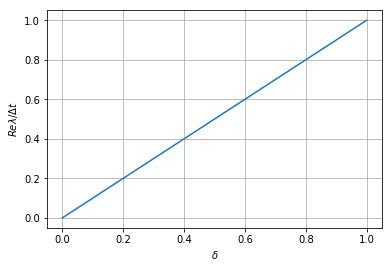

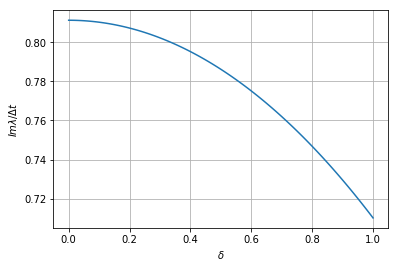

In [75]:
grid()
xlabel(r'$\delta$')
ylabel(r'$Re \lambda / \Delta t$')
plot(deltas, decrements)
show()
grid()
xlabel(r'$\delta$')
ylabel(r'$Im \lambda / \Delta t$')
plot(deltas, freqs);